## Chapter 4

In [85]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [87]:
import imageio.v2 as imageio

img_arr = imageio.imread("C:/Users/yoonh/deeplearning/fruits/red_apple.png.png")
type(img_arr), img_arr.shape, img_arr.dtype

(imageio.core.util.Array, (960, 960, 3), dtype('uint8'))

In [88]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 960, 960, dtype=torch.uint8)

In [89]:
import os

data_dir = "C:/Users/yoonh/deeplearning/fruits/"
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

filenames

['red_apple.png.png']

In [90]:
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

In [91]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
out.shape

torch.Size([3, 960, 960])

In [92]:
batch = batch.float()
batch /= 255.0
batch.dtype, batch.shape

(torch.float32, torch.Size([3, 3, 960, 960]))

In [93]:
batch # 이미지를 텐서로 변환

tensor([[[[1., 1.,  ..., 1., 1.],
          [1., 1.,  ..., 1., 1.],
          ...,
          [1., 1.,  ..., 1., 1.],
          [1., 1.,  ..., 1., 1.]],

         [[1., 1.,  ..., 1., 1.],
          [1., 1.,  ..., 1., 1.],
          ...,
          [1., 1.,  ..., 1., 1.],
          [1., 1.,  ..., 1., 1.]],

         [[1., 1.,  ..., 1., 1.],
          [1., 1.,  ..., 1., 1.],
          ...,
          [1., 1.,  ..., 1., 1.],
          [1., 1.,  ..., 1., 1.]]],


        [[[0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.],
          ...,
          [0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.]],

         [[0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.],
          ...,
          [0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.]],

         [[0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.],
          ...,
          [0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.]]],


        [[[0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.],
          

In [94]:
n_channels = batch.shape[1]

for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

mean # mean 메소드 사용

tensor(0.1774)

## Chapter 5

In [156]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [157]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [158]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b
# w1과 w2로 정의하였음

In [159]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [160]:
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w1, w2, b)
t_p

# w1과 w2 각각 따로 처리

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [161]:
loss = loss_fn(t_p, t_c)
loss

# 모델을 변경했더니 loss 값의 변화 또한 생겼음

tensor(11709471.)

In [162]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [163]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w1 + delta, w2 + delta, b), t_c) - loss_fn(model(t_u, w1 - delta, w2 - delta, b), t_c)) / (2.0 * delta)

In [164]:
loss_rate_of_change_w

tensor(23510544.)

In [165]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [166]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w1 + delta, w2 + delta, b), t_c) - loss_fn(model(t_u, w1 - delta, w2 - delta, b), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [167]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [168]:
def dmodel_dw1(t_u, w1, b):
    return t_u
def dmodel_dw2(t_u, w2, b):
    return t_u

In [169]:
def dmodel_db(t_u, w1, w2, b):
    return 1.0

In [170]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])  # <1>

In [171]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w1, w2, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [172]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params

        t_p = model(t_u, w1, w2, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [173]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), # w 두개로 변환
    t_u = t_u, 
    t_c = t_c
)

Epoch 1, Loss 11709471.000000
    Params: tensor([-3617.1025, -3617.1025,   -59.6420])
    Grad:   tensor([361810.2500, 361810.2500,   5964.1958])
Epoch 2, Loss 154402413346816.000000
    Params: tensor([13132855.0000, 13132855.0000,   216432.4531])
    Grad:   tensor([-1.3136e+09, -1.3136e+09, -2.1649e+07])
Epoch 3, Loss 2035400022002747047936.000000
    Params: tensor([-4.7682e+10, -4.7682e+10, -7.8582e+08])
    Grad:   tensor([4.7695e+12, 4.7695e+12, 7.8603e+10])
...


tensor([2.2822e+21, 2.2822e+21, 3.7611e+19])

In [174]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0, 0.0]), # w 두개로 변환
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 11709471.000000
    Params: tensor([-35.1810, -35.1810,  -0.5964])
    Grad:   tensor([361810.2500, 361810.2500,   5964.1958])
Epoch 2, Loss 14609815552.000000
    Params: tensor([1242.6469, 1242.6469,   20.4623])
    Grad:   tensor([-12778279.0000, -12778279.0000,   -210587.5312])
Epoch 3, Loss 18223183429632.000000
    Params: tensor([-43887.1992, -43887.1992,   -723.2882])
    Grad:   tensor([4.5130e+08, 4.5130e+08, 7.4375e+06])
...
Epoch 10, Loss 85606257377629845279794819776905216.000000
    Params: tensor([3.0080e+15, 3.0080e+15, 4.9573e+13])
    Grad:   tensor([-3.0932e+19, -3.0932e+19, -5.0976e+17])
Epoch 11, Loss inf
    Params: tensor([-1.0624e+17, -1.0624e+17, -1.7508e+15])
    Grad:   tensor([1.0924e+21, 1.0924e+21, 1.8004e+19])


tensor([-1.0624e+17, -1.0624e+17, -1.7508e+15])

In [175]:
t_un = 0.1 * t_u

In [178]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c
)

# 기존과 다르게 값을 줄였음에도 발산하게 되었음

Epoch 1, Loss 675.794373
    Params: tensor([-1.7968, -1.7968, -0.4818])
    Grad:   tensor([279.6790, 279.6790,  48.1760])
Epoch 2, Loss 7072.701172
    Params: tensor([7.0940, 7.0940, 0.9808])
    Grad:   tensor([-889.0812, -889.0812, -146.2582])
Epoch 3, Loss 70292.179688
    Params: tensor([-21.1622, -21.1622,  -3.7362])
    Grad:   tensor([2825.6179, 2825.6179,  471.6976])
...
Epoch 10, Loss 757163163648.000000
    Params: tensor([70421.4453, 70421.4453, 11714.6602])
    Grad:   tensor([-9257780.0000, -9257780.0000, -1540080.2500])
Epoch 11, Loss 7648655179776.000000
    Params: tensor([-223820.7812, -223820.7812,  -37234.1445])
    Grad:   tensor([29424222.0000, 29424222.0000,  4894880.5000])
...


tensor([8.0326e+17, 8.0326e+17, 1.3363e+17])

In [182]:
t_unn = 0.01 * t_u

# 이전 단계보다 값을 더욱 줄여서 계산

In [183]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_unn, # <1>
    t_c = t_c
)

# 발산하지 않고 성공적으로 수렴

Epoch 1, Loss 165.449524
    Params: tensor([1.1270, 1.1270, 0.1938])
    Grad:   tensor([-12.6975, -12.6975, -19.3758])
Epoch 2, Loss 159.096924
    Params: tensor([1.2507, 1.2507, 0.3816])
    Grad:   tensor([-12.3768, -12.3768, -18.7821])
Epoch 3, Loss 153.096725
    Params: tensor([1.3714, 1.3714, 0.5636])
    Grad:   tensor([-12.0652, -12.0652, -18.2054])
...
Epoch 10, Loss 119.428703
    Params: tensor([2.1359, 2.1359, 1.6899])
    Grad:   tensor([-10.1199, -10.1199, -14.6077])
Epoch 11, Loss 115.619682
    Params: tensor([2.2346, 2.2346, 1.8314])
    Grad:   tensor([ -9.8729,  -9.8729, -14.1512])
...
Epoch 99, Loss 46.471333
    Params: tensor([6.1584, 6.1584, 5.5375])
    Grad:   tensor([-2.1030, -2.1030,  0.0441])
Epoch 100, Loss 46.381035
    Params: tensor([6.1793, 6.1793, 5.5368])
    Grad:   tensor([-2.0836, -2.0836,  0.0773])


tensor([6.1793, 6.1793, 5.5368])

In [184]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_unn, 
    t_c = t_c,
    print_params = False
)

params

# loss가 많이 줄었으며 성공적

Epoch 1, Loss 165.449524
Epoch 2, Loss 159.096924
Epoch 3, Loss 153.096725
...
Epoch 10, Loss 119.428703
Epoch 11, Loss 115.619682
...
Epoch 99, Loss 46.471333
Epoch 100, Loss 46.381035
...
Epoch 4000, Loss 2.250845
Epoch 5000, Loss 2.131813


tensor([ 25.9742,  25.9742, -10.5755])

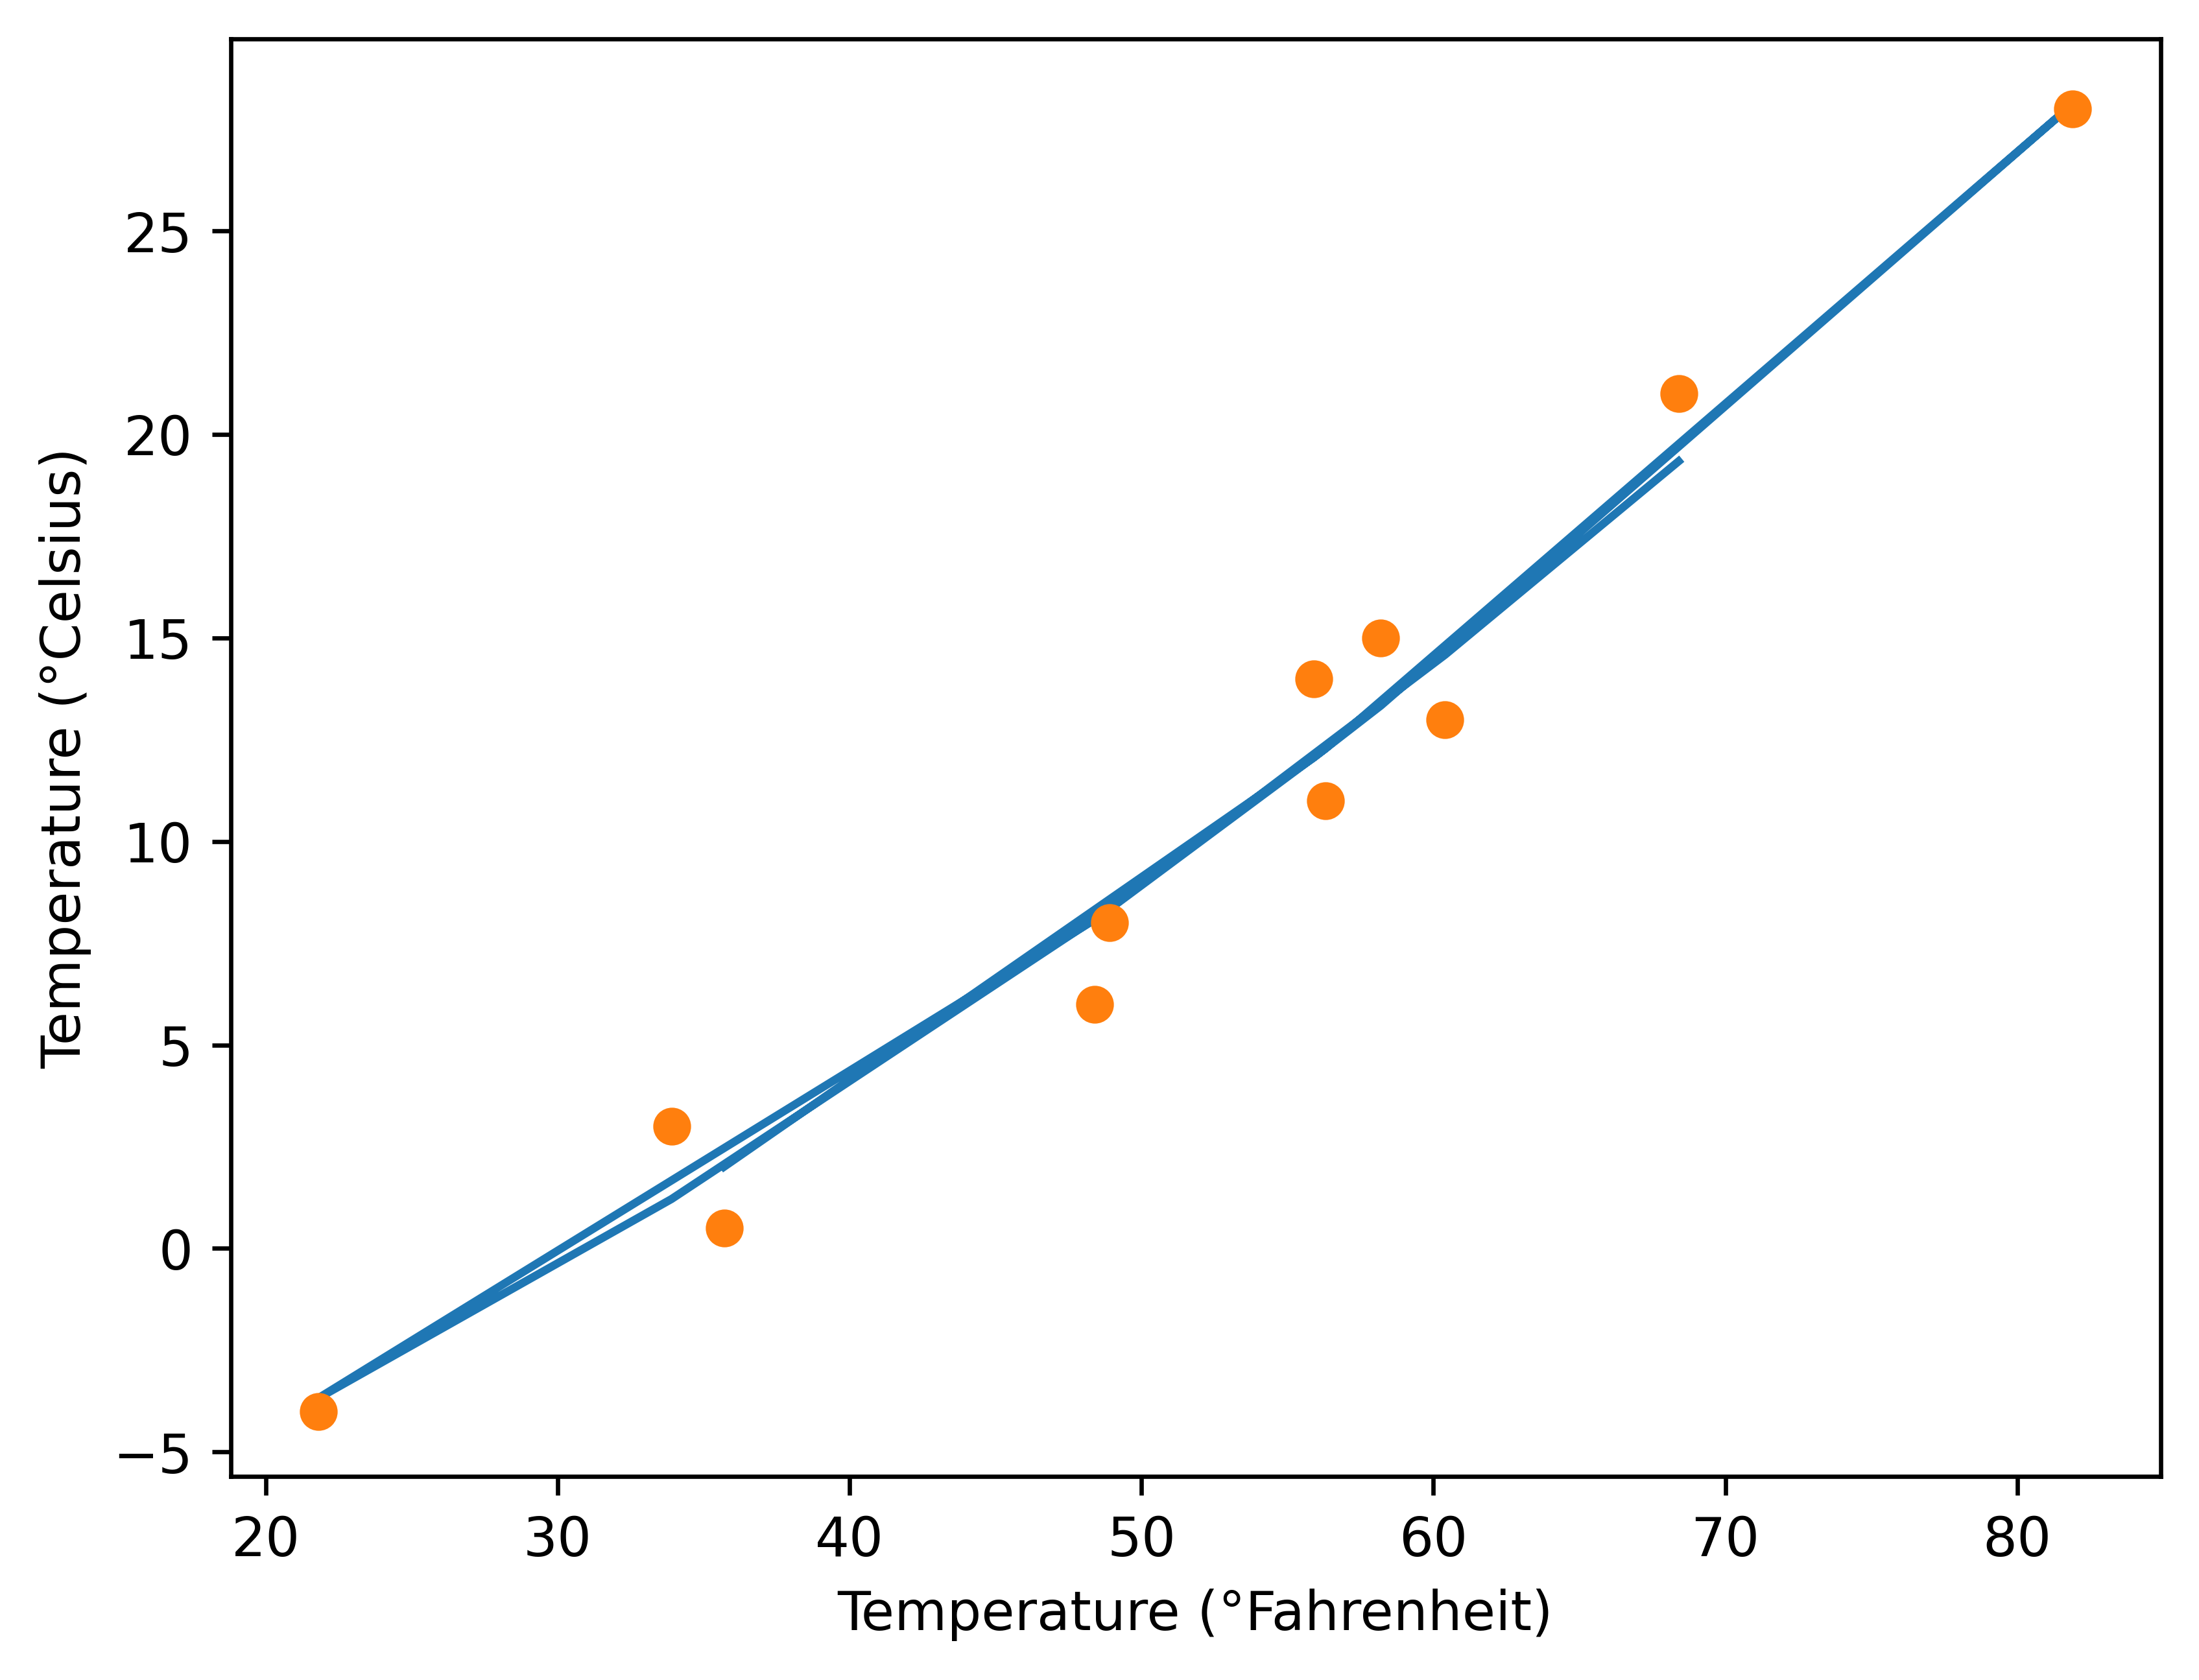

In [185]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_unn, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

## Chapter 6

In [186]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, precision=2, linewidth=75)

In [188]:
import csv
wine_path = "C:/Users/yoonh/deeplearning/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)


wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [189]:
wineq_numpy.shape, wineq_numpy.dtype

((4898, 12), dtype('float32'))

In [190]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

col_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [191]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [192]:
data = wineq[:, :-1] # <1>
data, data.shape

(tensor([[ 7.00,  0.27,  ...,  0.45,  8.80],
         [ 6.30,  0.30,  ...,  0.49,  9.50],
         ...,
         [ 5.50,  0.29,  ...,  0.38, 12.80],
         [ 6.00,  0.21,  ...,  0.32, 11.80]]),
 torch.Size([4898, 11]))

In [193]:
target = wineq[:, -1] # <2>
target, target.shape, target.dtype

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]), torch.float32)

In [194]:
target = wineq[:, -1].long()
target, target.shape, target.dtype

(tensor([6, 6,  ..., 7, 6]), torch.Size([4898]), torch.int64)

In [195]:

target_onehot = torch.zeros(target.shape[0], 10)

In [196]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [197]:
target_onehot.scatter_(1, target_unsqueezed, 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [198]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.85e+00, 2.78e-01, 3.34e-01, 6.39e+00, 4.58e-02, 3.53e+01,
        1.38e+02, 9.94e-01, 3.19e+00, 4.90e-01, 1.05e+01])

In [199]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.12e-01, 1.02e-02, 1.46e-02, 2.57e+01, 4.77e-04, 2.89e+02,
        1.81e+03, 8.95e-06, 2.28e-02, 1.30e-02, 1.51e+00])

In [200]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.72e-01, -8.18e-02,  ..., -3.49e-01, -1.39e+00],
        [-6.57e-01,  2.16e-01,  ...,  1.34e-03, -8.24e-01],
        ...,
        [-1.61e+00,  1.17e-01,  ..., -9.63e-01,  1.86e+00],
        [-1.01e+00, -6.77e-01,  ..., -1.49e+00,  1.04e+00]])

In [201]:
bad_indexes = target <= 3 # <1>
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [202]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [203]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)] # <1>
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [204]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [205]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [206]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)